# Project 2

It is October 2018. The squirrels in Central Park are running into a problem and we need your help.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

You must submit all data files and a pickled preprocessor and final model along with this notebook.

## Frame the Problem and Look at the Big Picture

1. Define the objective in business terms
<mark>The primary business objective is to efficiently manage resources in Central Park to mitigate the spread of a disease among the squirrel population. The goal is to identify and test squirrels that are likely infected by analyzing sighting data and behavioral patterns to preserve the ecological balance without exhausting available resources.</mark>

2. How will your solution be used?
<mark>The machine learning solution will be used to predict the likelihood of a squirrel being infected based on sightings and behavior patterns. This predictive model will help park authorities decide when to deploy testing resources to specific sightings, ensuring that interventions are timely and effective, minimizing unnecessary testing and focusing efforts on high-risk cases.</mark>

3. How should you frame this problem?
<mark>This problem should be framed as a binary classification issue where the outcome to predict is whether a squirrel needs to be tested based on the likelihood of infection. Input features might include location data, time of sighting, behaviors exhibited, and any other environmental or direct observations noted during the sighting.</mark>

4. How should performance be measured? Is the performance measure aligned with the business objective?
<mark>Performance should be measured using metrics such as accuracy, precision, recall, and the area under the ROC curve (AUC-ROC). Precision is particularly important as it reflects the proportion of true positives among all positive predictions, aligning with the business objective of maximizing resource efficiency and minimizing unnecessary tests.</mark>

5. What would be the minimum performance needed to reach the business objective?
<mark>The minimum performance would likely require a high precision to ensure that only squirrels highly likely to be infected are tested. A precision threshold of at least 80% might be considered essential to avoid wasting limited testing resources and personnel time.</mark>

6. What are comparable problems? Can you reuse (personal or readily available) experience or tools?
<mark>Comparable problems include medical diagnostic tests, wildlife monitoring for disease control, and other predictive maintenance tasks. Tools and experiences from these areas, such as decision trees, logistic regression, or more complex machine learning models like Random Forests or SVMs, could be adapted for use in this project.</mark>

7. Is human expertise available?
<mark>Yes, park rangers, wildlife experts, and veterinarians would be available to provide insights into squirrel behaviors, symptoms of the disease, and other ecological factors that might influence the spread of the disease.</mark>

8. How would you solve the problem manually?
<mark>Manually, the problem would be solved by having experts review each sighting report, assessing the likelihood of infection based on the squirrel's behavior, physical symptoms observed, and the context of the sighting (e.g., location, time, other environmental factors).</mark>

9. List the assumptions you (or others) have made so far. Verify assumptions if possible.
<mark>Assumptions include:</mark>
- <mark>The data collected accurately represents the overall squirrel population and their health status.</mark>
- <mark>Behavioral patterns can reliably indicate health status.</mark>
- <mark>The disease has visible or otherwise detectable symptoms that can be observed in a park setting.</mark>
- <mark>Testing resources and personnel are limited and must be efficiently allocated.</mark>



Get the Data
============
1. List the data you need and how much you need
- <mark>Squirrel Sightings Data<mark>

- <mark>Squirrel Health Status Data<mark>

- <mark>Behavioral Observations Data<mark>

- <mark>Environmental and Weather Data<mark>





2.  Find and document where you can get that data

-  diseased_squirrels.csv - provides unique identfier for the squirrels, time of day and date 


- 2018 Central Park Squirrel Census - Squirrel Data

    https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw/data_preview


- 2018 Squirrel Census Fur Color Map
    https://data.cityofnewyork.us/Environment/2018-Squirrel-Census-Fur-Color-Map/fak5-wcft


- 2018 Central Park Squirrel Census - Stories (maybe)
    https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Stories/gfqj-f768/about_data




3. Get access authorizations


4. Create a workspace: 
- This notebook 

5.  **Get the data**: 
   

6. **Convert the data to a format you can easily manipulate**:
   - Provided in CSV files so easy to use.

7. **Ensure sensitive information is deleted or protected**:
- Public data already has been anonymized.

8. **Check the size and type of data (time series, geographical, …)**

    1. 
        <mark>•	Stories Data: 809 entries with 12 columns, mostly text fields with topics related to squirrel and park stories. It’s not a time series; it has categorical and textual data.
	    •	Diseased Squirrels Data: 321 entries with a single column of string IDs, likely for mapping squirrel disease occurrences.
	    •	Squirrel Census Data: 3023 entries with 31 columns, including geolocation data (X, Y coordinates) and various observational fields (e.g., fur color, behaviors). The Date column could make it useful as a time series, though it appears to be event-based.<mark>
    
    2. Is it a time series?
       <mark> •	Squirrel Census Data is the only set that could potentially be analyzed as a time series using the Date field. The other datasets do not contain any inherent temporal ordering.<mark>
    
    3. Are any of the features unusable for the business problem?
        <mark>•	Stories Data: Several columns have high missing values, e.g., “Story Topic: Accidental Poems” and “Story Topic: Squirrels Acting Odd.” These may be excluded if they don’t serve the analysis.
	    •	Diseased Squirrels Data: Single-column format, usable only if it serves a direct purpose in identifying health statuses.
	    •	Squirrel Census Data: Columns like “Other Activities” and “Other Interactions” contain mostly missing data and may be omitted unless critical for the business problem.<mark>

    4. Which feature(s) will be used as the target/label for the business problem? (including which are required to derive the correct label)
        <mark>•	Target Feature: This depends on the business question, but for a health-related analysis, fields like “Age” or behaviors (“Running,” “Foraging”) in the Squirrel Census data could be candidates, or mapping ID matches between the Diseased Squirrels and Squirrel Census data to determine health status patterns.<mark>

    5. Should any of the features be stratified during the train/test split to avoid sampling biases?
       	<mark>•	Stratification might be necessary based on “Age” or “Primary Fur Color” in the Squirrel Census data to maintain diversity in demographic features. If focusing on health outcomes, stratifying by a feature related to disease occurrence or geography may reduce sampling bias.<mark>

Explore the Data
================


1. Copy the data for exploration, downsampling to a manageable size if necessary.

2. Study each attribute and its characteristics: Name; Type (categorical, numerical, bounded, text, structured, ...); % of missing values; Noisiness and type of noise (stochastic, outliers, rounding errors, ...); Usefulness for the task; Type of distribution (Gaussian, uniform, logarithmic, ...)

3. For supervised learning tasks, identify the target attribute(s)

4. Visualize the data

5. Study the correlations between attributes

6. Study how you would solve the problem manually

7. Identify the promising transformations you may want to apply

8. Identify extra data that would be useful (go back to “Get the Data”)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn import set_config
set_config(transform_output = "pandas")

In [4]:
# Load CSV files into variables
squirrel_data = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20241106.csv')

stories_data = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Stories_20241106.csv')

diseased_squirrels = pd.read_csv('diseased_squirrels.csv')

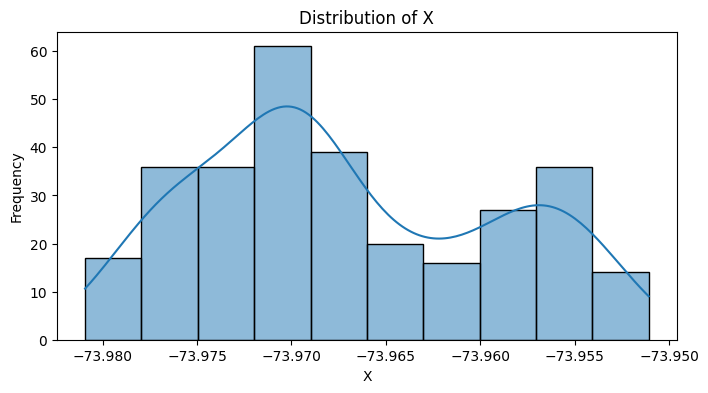

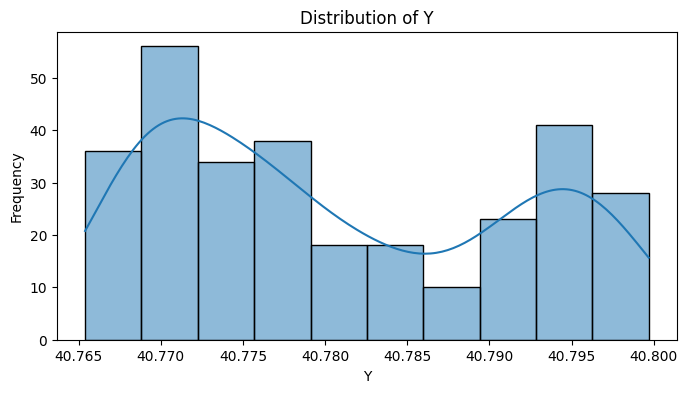

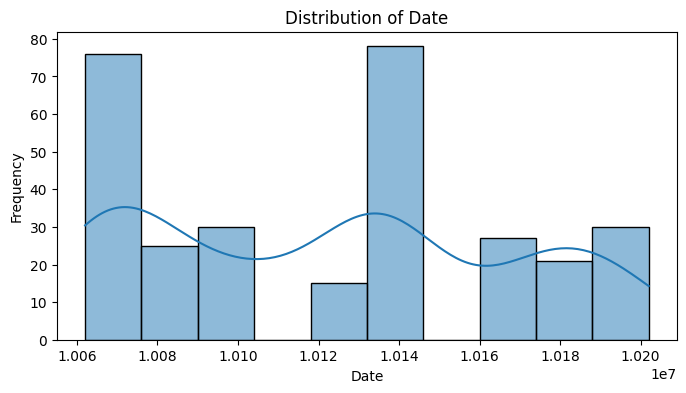

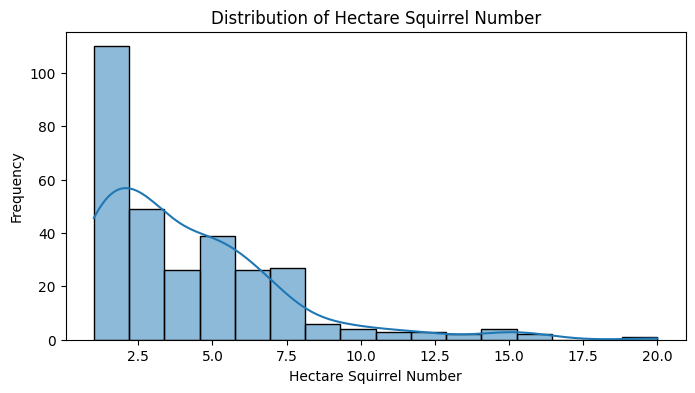

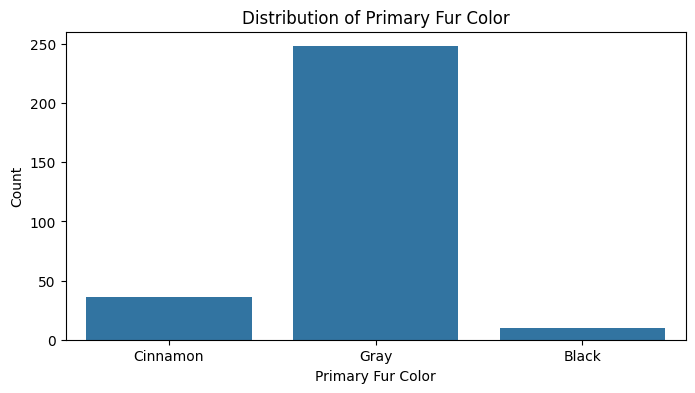

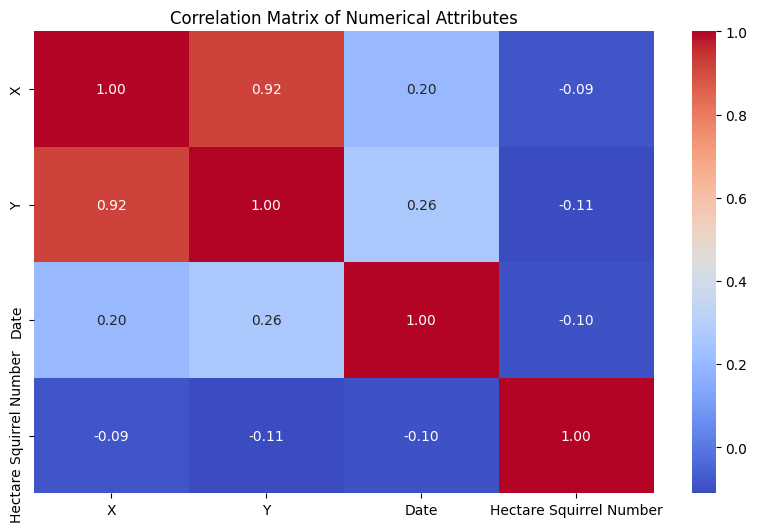

In [5]:
# Downsample if necessary
sample_squirrel_data = squirrel_data.sample(frac=0.1, random_state=42) if len(squirrel_data) > 1000 else squirrel_data

# 1. Visualize distributions for numerical attributes
numerical_features = ['X', 'Y', 'Date', 'Hectare Squirrel Number']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(sample_squirrel_data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# 2. Visualize the distribution of "Primary Fur Color"
plt.figure(figsize=(8, 4))
sns.countplot(data=sample_squirrel_data, x="Primary Fur Color")
plt.title('Distribution of Primary Fur Color')
plt.xlabel("Primary Fur Color")
plt.ylabel("Count")
plt.show()

# 3. Correlation Matrix of Numerical Attributes
correlation_matrix = sample_squirrel_data[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Attributes")
plt.show()

## Explore the Data (Squirel Data)

1. **Data Copy and Downsampling**: A sample of 10% of the dataset was created for exploration, as the full dataset size was manageable for analysis.

2. **Attribute Study**: A detailed summary has been provided in the **Attribute Summary** table, showing the name, type, percentage of missing values, and initial notes on each attribute’s distribution and usefulness. Here’s a quick breakdown:
   - **Numerical Attributes**: `X`, `Y`, `Date`, and `Hectare Squirrel Number` mostly follow non-Gaussian distributions.
   - **Categorical Attributes**: Many behavioral flags (`Running`, `Chasing`, etc.) are boolean and may benefit from encoding if used in a model.
   - **Missing Values**: Attributes like `Highlight Fur Color` and `Color notes` have high missing values.

3. **Target Attribute**: For a classification task, `Primary Fur Color` could serve as the target variable.

4. **Data Visualization**: The distributions of numerical and categorical attributes (such as `Primary Fur Color`) were visualized to understand their characteristics.

5. **Attribute Correlations**: The correlation matrix revealed:
   - **High correlation** between `X` and `Y`, indicating that these location coordinates have a relationship.
   - **Weak to negligible correlations** among other numerical attributes.

6. **Manual Problem Solving**: A manual approach would involve categorizing squirrels by visual features (like fur color and age) and observing patterns in behavior manually recorded. This process could then be extended to examine behavioral or demographic patterns among squirrels of different types.

7. **Promising Transformations**:
   - **Encoding** categorical variables (like `Shift` and boolean flags for behavior).
   - **Date Feature Engineering**: Breaking `Date` into day, month, and year components to explore any temporal trends.
   - **Handling Missing Values**: For features with significant missing values, imputation or exclusion may be necessary, depending on the importance.

8. **Additional Data Needs**:
   - **Weather Data**: Adding temperature and precipitation data for specific dates could provide insights into how weather affects squirrel behaviors.
   - **Human Activity Data**: Information on human foot traffic or events in Central Park may influence squirrel behavior patterns.